# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 06

Group Members:
- Yusuf Ardian Sandi (13522015)
- Dhidit Abdi Aziz (13522040)
- Sa'ad Abdul Hakim (13522092)
- Rifki V. H. (13522120)

## Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import display, Markdown
from scipy.stats import chi2_contingency, f_oneway
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler


# Import other libraries if needed

## Import Dataset

In [56]:
# Example of reading a csv file from a gdrive link
# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public
# df = pd.read_csv('https://drive.google.com/uc?id=1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU')
# df.head()

# Reading metadata
markdown_content = "### Metadata\n"
# display(Markdown(markdown_content))
# df_metadata = pd.read_csv('https://drive.google.com/uc?id=1gcHRql5AA87oOJouZ2z56d5K6nZpfRos')
df_metadata = pd.read_csv('../datasets/metadata.csv')
pd.set_option('display.max_colwidth', None)
display(df_metadata)

# Write the metadata to metadata.csv
# df_metadata.to_csv('../datasets/metadata.csv', index=False)


,No.,Name,Type,Description,feature_type
0,5,proto,nominal,Transaction protocol,flow
1,6,state,nominal,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)",basic
2,7,dur,Float,Record total duration,basic
3,8,sbytes,Integer,Source to destination transaction bytes,basic
4,9,dbytes,Integer,Destination to source transaction bytes,basic
5,10,sttl,Integer,Source to destination time to live value,basic
6,11,dttl,Integer,Destination to source time to live value,basic
7,12,sloss,Integer,Source packets retransmitted or dropped,basic
8,13,dloss,Integer,Destination packets retransmitted or dropped,basic
9,14,service,nominal,"http, ftp, smtp, ssh, dns, ftp-data ,irc and (-) if not much used service",basic


In [57]:
# List of links for train_dataset
# additional_features_train.csv = https://drive.google.com/file/d/1MUHE2WwBPBUFm0G0lgCsvTBMJWWkoz13/view?usp=sharing
# basic_features_train.csv = https://drive.google.com/file/d/1zv9UMwhuBjpy6x1lrtXkhhi2UamBuxpS/view?usp=sharing
# content_features_train.csv = https://drive.google.com/file/d/1XNKxhf_DO_EMgj2c-D5vKRK0aWekPzn_/view?usp=sharing
# flow_features_train.csv = https://drive.google.com/file/d/1p7u1eY2fq_cWMvASLYdG__Uuv1JRuwa_/view?usp=sharing
# (target features) labels_train.csv = https://drive.google.com/file/d/1OL9iPj11nGyFg3HxRL0AC2iGIi1EO_lx/view?usp=sharing
# time_features_train = https://drive.google.com/file/d/18_Yxf4N2JW1iAvUJmQC7YxHAqtbF4B_4/view?usp=sharing
# (metadata) UNSW-NB15_features-modified.csv = https://drive.google.com/file/d/1gcHRql5AA87oOJouZ2z56d5K6nZpfRos/view?usp=sharing

# df_additional = pd.read_csv('../datasets/train_dataset/additional_features_train.csv')
# df_basic = pd.read_csv('../datasets/train_dataset/basic_features_train.csv')
# df_content = pd.read_csv('../datasets/train_dataset/content_features_train.csv')
# df_flow = pd.read_csv('../datasets/train_dataset/flow_features_train.csv')
# df_labels = pd.read_csv('../datasets/train_dataset/labels_train.csv')
# df_time = pd.read_csv('../datasets/train_dataset/time_features_train.csv')

# df_train = pd.merge(df_additional, df_basic, on='id')
# df_train = pd.merge(df_train, df_content, on='id')
# df_train = pd.merge(df_train, df_flow, on='id')
# df_train = pd.merge(df_train, df_labels, on='id')
# df_train = pd.merge(df_train, df_time, on='id')

# Drop label feature (QnA No two)
# df_train = df_train.drop(columns=['label'])

# Write df_train to csv
# df_train.to_csv('../datasets/train_dataset.csv', index=False)

df_train = pd.read_csv('../datasets/train_dataset.csv')

markdown_content = "#### Train Dataset\n"
display(Markdown(markdown_content))
display(df_train.head())
markdown_content = "Row Size: " + str(df_train.shape[0]) + "\n"
markdown_content += "Column Size: " + str(df_train.shape[1]) + "\n"
display(Markdown(markdown_content))


#### Train Dataset


,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,response_body_len,proto,attack_cat,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,...,0.0,tcp,Normal,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114
1,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,...,0.0,udp,Generic,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN
2,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,...,0.0,tcp,Exploits,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924
3,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,...,0.0,tcp,Normal,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN
4,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,...,0.0,udp,Normal,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000


Row Size: 175341
Column Size: 43


In [58]:
# List of links for test_dataset
# additional_features_test.csv = https://drive.google.com/file/d/1p2m35E6ZfN_6ei-8LU0kbuRJuJ2m0Pwx/view?usp=sharing
# basic_features_test.csv = https://drive.google.com/file/d/18lWw3xWS2EmK6crxqZFTzWd0VmZkQTzt/view?usp=sharing
# content_features_test.csv = https://drive.google.com/file/d/1fRSZ5e-5SAg4d87smgsC4TT_OhBGi6HL/view?usp=sharing
# flow_features_test.csv = https://drive.google.com/file/d/1hUzzH8D_KyHL5HIx_9zHEZOWCkKLW_dW/view?usp=sharing
# (target features) labels_test.csv = none
# time_features_test.csv = https://drive.google.com/file/d/1S14SoGzgR8TYvV0EVWszTUoDAJqg-Ppo/view?usp=sharing
# (metadata) UNSW-NB15_features-modified.csv = https://drive.google.com/file/d/1qUWn06ET9vXBojumNI1IMKSAIuSwfaD2/view?usp=sharing

# df_additional = pd.read_csv('../datasets/test_dataset/additional_features_test.csv')
# df_basic = pd.read_csv('../datasets/test_dataset/basic_features_test.csv')
# df_content = pd.read_csv('../datasets/test_dataset/content_features_test.csv')
# df_flow = pd.read_csv('../datasets/test_dataset/flow_features_test.csv')
# df_time = pd.read_csv('../datasets/test_dataset/time_features_test.csv')

# df_test = pd.merge(df_additional, df_basic, on='id')
# df_test = pd.merge(df_test, df_content, on='id')
# df_test = pd.merge(df_test, df_flow, on='id')
# df_test = pd.merge(df_test, df_time, on='id')

# Write df_test to csv
# df_test.to_csv('../datasets/test_dataset.csv', index=False)

df_test = pd.read_csv('../datasets/test_dataset.csv')

markdown_content = "#### Test Dataset\n"
display(Markdown(markdown_content))
display(df_test.head())
markdown_content = "Row Size: " + str(df_test.shape[0]) + "\n"
markdown_content += "Column Size: " + str(df_test.shape[1]) + "\n"
display(Markdown(markdown_content))

#### Test Dataset


,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,trans_depth,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,0.0,1.0,0.0,0.0,0.0,5.0,5.0,2.0,2.0,2.0,...,0.0,0.0,tcp,2737.954123,118.833969,48.756556,76.593602,0.165117,0.072001,0.093116
1,0.0,1.0,0.0,NaN,0.0,6.0,6.0,1.0,1.0,1.0,...,0.0,0.0,tcp,2938.299144,165.780563,49.812539,109.557602,0.223604,0.100248,0.123356
2,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,1.0,...,0.0,0.0,tcp,4287.453629,129.471406,69.765530,94.395906,0.113189,0.082498,0.030691
3,0.0,2.0,0.0,0.0,0.0,10.0,4.0,2.0,4.0,2.0,...,0.0,0.0,udp,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000
4,NaN,0.0,NaN,0.0,0.0,13.0,11.0,10.0,7.0,6.0,...,0.0,0.0,tcp,1119.063538,26.748141,17.628799,15.543294,0.000655,0.000526,0.000129


Row Size: 20583
Column Size: 42


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [59]:
# Write your code here

# list of binary features
binary_features = ['is_sm_ips_ports', 'is_ftp_login']

# list of categorical 
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
# Filter out binary features from categorical features
for feature in binary_features:
    if feature in categorical_features:
        categorical_features.remove(feature)

# list of numerical features
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Filter out binary features from numerical features
for feature in binary_features:
    if feature in numerical_features:
        numerical_features.remove(feature)
numerical_features.remove('id')

markdown_content = "### Total Features\n"
markdown_content += f"* Total features (without id): {len(categorical_features) + len(numerical_features) + len(binary_features)}\n"
markdown_content += f"* Total categorical features: {len(categorical_features)}\n"
markdown_content += f"* Total numerical features: {len(numerical_features)}\n"
markdown_content += f"* Total binary features: {len(binary_features)}\n"
markdown_content += "\n### Categorical Features\n"
markdown_content += "\n".join([f"* {feature}" for feature in categorical_features])
markdown_content += "\n\n### Numerical Features\n"
markdown_content += "\n".join([f"* {feature}" for feature in numerical_features])
markdown_content += "\n\n### Binary Features\n"
markdown_content += "\n".join([f"* {feature}" for feature in binary_features])

display(Markdown(markdown_content))

### Total Features
* Total features (without id): 42
* Total categorical features: 4
* Total numerical features: 36
* Total binary features: 2

### Categorical Features
* state
* service
* proto
* attack_cat

### Numerical Features
* ct_state_ttl
* ct_flw_http_mthd
* ct_ftp_cmd
* ct_srv_src
* ct_srv_dst
* ct_dst_ltm
* ct_src_ltm
* ct_src_dport_ltm
* ct_dst_sport_ltm
* ct_dst_src_ltm
* dur
* sbytes
* dbytes
* sttl
* dttl
* sloss
* dloss
* sload
* dload
* spkts
* dpkts
* swin
* dwin
* stcpb
* dtcpb
* smean
* dmean
* trans_depth
* response_body_len
* sjit
* djit
* sinpkt
* dinpkt
* tcprtt
* synack
* ackdat

### Binary Features
* is_sm_ips_ports
* is_ftp_login

In [60]:
def generate_categorical_summary(data, categorical_features):
    """
    Generate markdown summary for categorical features.
    """
    markdown_content = "### Categorical Features Values\n"
    for feature in categorical_features:
        markdown_content += f"\n#### {feature}\n"
        markdown_content += f"* Unique values: {data[feature].nunique()}\n"
        markdown_content += f"* Values: {data[feature].unique()}\n"
    return markdown_content

def generate_numerical_summary(data, numerical_features):
    """
    Generate markdown summary for numerical features.
    """
    markdown_content = "### Numerical Features Values\n"
    for feature in numerical_features:
        unique_values = data[feature].nunique()
        markdown_content += f"\n#### {feature}\n"
        if unique_values > 150:  # More detailed stats for high-cardinality features
            markdown_content += f"* Min: {data[feature].min()}\n"
            markdown_content += f"* Mean: {data[feature].mean()}\n"
            markdown_content += f"* Max: {data[feature].max()}\n"
            markdown_content += f"* STD: {data[feature].std()}\n"
            markdown_content += f"* 25%: {data[feature].quantile(0.25)}\n"
            markdown_content += f"* 50%: {data[feature].quantile(0.50)}\n"
            markdown_content += f"* 75%: {data[feature].quantile(0.75)}\n"
        else:
            markdown_content += f"* Unique values: {unique_values}\n"
            markdown_content += f"* Values: {data[feature].unique()}\n"
    return markdown_content

def generate_binary_summary(data, binary_features):
    """
    Generate markdown summary for binary features.
    """
    markdown_content = "### Binary Features Values\n"
    for feature in binary_features:
        markdown_content += f"\n#### {feature}\n"
        markdown_content += f"* Unique values: {data[feature].nunique()}\n"
        markdown_content += f"* Values: {data[feature].unique()}\n"
    return markdown_content

def display_feature_summaries(data, categorical_features, numerical_features, binary_features):
    """
    Generate and display markdown summaries for categorical, numerical, and binary features.
    """
    # Generate summaries
    categorical_summary = generate_categorical_summary(data, categorical_features)
    numerical_summary = generate_numerical_summary(data, numerical_features)
    binary_summary = generate_binary_summary(data, binary_features)
    
    # Display all summaries
    display(Markdown(categorical_summary))
    display(Markdown(numerical_summary))
    display(Markdown(binary_summary))

# Call the function
display_feature_summaries(df_train, categorical_features, numerical_features, binary_features)

### Categorical Features Values

#### state
* Unique values: 9
* Values: ['FIN' 'INT' 'CON' nan 'REQ' 'ECO' 'RST' 'URN' 'PAR' 'no']

#### service
* Unique values: 13
* Values: ['-' 'dns' 'smtp' nan 'http' 'pop3' 'ftp' 'ssh' 'ftp-data' 'ssl' 'dhcp'
 'snmp' 'radius' 'irc']

#### proto
* Unique values: 133
* Values: ['tcp' 'udp' 'st2' 'unas' 'irtp' nan 'vmtp' 'any' 'cpnx' 'sctp' 'ospf'
 'fc' 'cftp' 'rsvp' 'aris' 'dgp' 'ipv6-route' 'snp' 'pnni' 'arp' 'cbt'
 'scps' 'tcf' 'leaf-1' 'swipe' 'wb-mon' 'crudp' 'sun-nd' 'rdp' 'gmtp'
 'ifmp' 'mobile' 'prm' 'sps' 'ipx-n-ip' 'ipip' 'ipv6-no' 'crtp' 'gre'
 'zero' 'hmp' 'trunk-1' 'idpr' 'ib' 'idpr-cmtp' 'vines' 'micp' 'a/n'
 'ipv6' 'narp' 'ttp' 'eigrp' 'uti' 'mux' 'pim' 'srp' 'wsn' 'tlsp' 'argus'
 '3pc' 'ax.25' 'ipnip' 'l2tp' 'skip' 'ipv6-frag' 'il' 'rvd' 'visa' 'xtp'
 'sm' 'xns-idp' 'ipv6-opts' 'encap' 'ippc' 'merit-inp' 'dcn' 'netblt'
 'bbn-rcc' 'emcon' 'nsfnet-igp' 'iso-tp4' 'ipcv' 'sat-mon' 'nvp' 'i-nlsp'
 'etherip' 'pvp' 'smp' 'idrp' 'ipcomp' 'mhrp' 'ddx' 'icmp' 'kryptolan'
 'tp++' 'aes-sp3-d' 'wb-expak' 'sprite-rpc' 'iso-ip' 'mtp' 'chaos' 'sep'
 'fire' 'ip' 'sccopmce' 'ddp' 'br-sat-mon' 'pgm' 'pri-enc' 'iplt' 'egp'
 'leaf-2' 'vrrp' 'ptp' 'pipe' 'pup' 'sat-expak' 'secure-vmtp' 'trunk-2'
 'cphb' 'sdrp' 'ggp' 'qnx' 'xnet' 'compaq-peer' 'stp' 'igp' 'mfe-nsp'
 'bna' 'isis' 'iatp' 'larp' 'igmp' 'rtp']

#### attack_cat
* Unique values: 10
* Values: ['Normal' 'Generic' 'Exploits' 'Fuzzers' 'DoS' 'Reconnaissance' 'Analysis'
 'Backdoor' 'Shellcode' 'Worms']


### Numerical Features Values

#### ct_state_ttl
* Unique values: 5
* Values: [ 0.  2. nan  1.  3.  6.]

#### ct_flw_http_mthd
* Unique values: 11
* Values: [ 0. nan  1.  4.  2.  6. 16. 30.  9. 25. 12.  3.]

#### ct_ftp_cmd
* Unique values: 4
* Values: [ 0. nan  1.  2.  4.]

#### ct_srv_src
* Unique values: 52
* Values: [11. 10.  4.  9.  3. 34.  6.  1. 17. nan 13. 31. 42.  5.  7.  2. 27. 12.
 33. 14. 26.  8. 24. 29. 38. 36. 63. 19. 20. 46. 18. 44. 28. 30. 22. 40.
 21. 23. 25. 32. 15. 51. 16. 39. 35. 43. 50. 49. 37. 41. 45. 52. 47.]

#### ct_srv_dst
* Unique values: 52
* Values: [nan 10.  4.  9.  3. 34.  1.  5. 17. 13.  2. 31. 42. 16.  7. 27. 26.  6.
 33. 14.  8. 12. 24. 29. 18. 36. 62. 19. 44. 20. 46. 28. 30. 22. 40. 23.
 25. 39. 32. 51. 21. 35. 11. 43. 15. 50. 49. 38. 37. 41. 45. 47. 52.]

#### ct_dst_ltm
* Unique values: 50
* Values: [ 5. 10.  2.  3.  4. 25. nan  1. 17.  7. 24. 31. 30. 16.  8. 14. 18. 29.
 13. 36. 33. 12. 28. 11. 19. 32.  9. 23. 34. 15.  6. 35. 51. 21. 22. 20.
 45. 27. 37. 26. 50. 38. 46. 42. 48. 39. 41. 43. 40. 44. 47.]

#### ct_src_ltm
* Unique values: 50
* Values: [ 4. 10.  2.  3. 25.  9. nan  1. 18. 17.  5. 24. 31. 30.  7. 16. 22. 20.
  8.  6. 35. 29. 12. 36. 34. 26. 13. 14. 28. 11. 21. 33. 32. 19. 27. 51.
 15. 46. 50. 38. 23. 37. 42. 40. 41. 39. 43. 44. 60. 45. 47.]

#### ct_src_dport_ltm
* Unique values: 47
* Values: [ 2. nan  1. 25.  9.  3. 17.  5. 24. 31. 10. 16.  8. 13.  4. 29. 18. 12.
 36. 33. 28. 11. 32.  6. 23. 34. 15. 51. 14. 21. 20.  7. 45. 19. 46. 22.
 26. 50. 38. 35. 27. 42. 30. 37. 41. 39. 43. 40.]

#### ct_dst_sport_ltm
* Unique values: 32
* Values: [ 1. 10. nan 12.  9.  2. 17. 14. 15.  3. 16.  8.  4.  5. 18. 24.  7. 13.
  6. 11. 27. 46. 22. 20. 23. 19. 26. 28. 21. 25. 31. 37. 40.]

#### ct_dst_src_ltm
* Unique values: 54
* Values: [ 5. 10.  4.  6.  1. 34.  9.  3. 17.  2. 13.  7. nan 31. 42. 27. 26. 12.
 24. 29. 18. 38. 36. 63. 19. 44. 20.  8. 46. 33. 28. 30. 22. 40. 23. 25.
 32. 39. 14. 51. 15. 16. 21. 35. 43. 41. 11. 50. 49. 37. 45. 47. 52. 65.
 54.]

#### dur
* Min: 0.0
* Mean: 1.3592994882816485
* Max: 59.999989
* STD: 6.485385649135379
* 25%: 8e-06
* 50%: 0.001548
* 75%: 0.6673105

#### sbytes
* Min: 28.0
* Mean: 8734.078600551626
* Max: 12965233.0
* STD: 171228.85072673392
* 25%: 114.0
* 50%: 450.0
* 75%: 1418.0

#### dbytes
* Min: 0.0
* Mean: 14935.893844009803
* Max: 14655550.0
* STD: 143015.03955483277
* 25%: 0.0
* 50%: 164.0
* 75%: 1096.0

#### sttl
* Unique values: 11
* Values: [ 31. 254.  nan  62.   0.  63.  64.   1.  60. 255.  29. 252.]

#### dttl
* Unique values: 6
* Values: [ 29.   0. 252.  nan  60.  31. 254.]

#### sloss
* Min: 0.0
* Mean: 4.904789638960774
* Max: 4803.0
* STD: 64.86784869300607
* 25%: 0.0
* 50%: 0.0
* 75%: 3.0

#### dloss
* Min: 0.0
* Mean: 6.971688416294489
* Max: 5484.0
* STD: 51.80193623144368
* 25%: 0.0
* 50%: 0.0
* 75%: 2.0

#### sload
* Min: 0.0
* Mean: 73421861.28064474
* Max: 5988000256.0
* STD: 188456446.9523425
* 25%: 13030.319335
* 50%: 871454.4375
* 75%: 88888888.0

#### dload
* Min: 0.0
* Mean: 671859.5932926155
* Max: 22422730.0
* STD: 2422878.5321882768
* 25%: 0.0
* 50%: 1426.6297
* 75%: 28074.09961

#### spkts
* Min: 1.0
* Mean: 20.26613353170913
* Max: 9616.0
* STD: 136.4338947264106
* 25%: 2.0
* 50%: 2.0
* 75%: 12.0

#### dpkts
* Min: 0.0
* Mean: 18.923014611022772
* Max: 10974.0
* STD: 110.89813260712172
* 25%: 0.0
* 50%: 2.0
* 75%: 10.0

#### swin
* Unique values: 11
* Values: [255.   0.  nan 168. 103.  87. 167. 192.  45.  42.  14. 172.]

#### dwin
* Unique values: 7
* Values: [255.   0.  nan  48.  37.  70. 244.  40.]

#### stcpb
* Min: 0.0
* Mean: 969620990.2456065
* Max: 4294958913.0
* STD: 1355283907.0414243
* 25%: 0.0
* 50%: 0.0
* 75%: 1915654284.0

#### dtcpb
* Min: 0.0
* Mean: 969347904.2061691
* Max: 4294881924.0
* STD: 1354112982.0674932
* 25%: 0.0
* 50%: 0.0
* 75%: 1912672501.0

#### smean
* Min: 28.0
* Mean: 136.80384021902938
* Max: 1504.0
* STD: 204.75319389065405
* 25%: 57.0
* 50%: 73.0
* 75%: 100.0

#### dmean
* Min: 0.0
* Mean: 124.16104056797569
* Max: 1458.0
* STD: 258.26575498944163
* 25%: 0.0
* 50%: 44.0
* 75%: 89.0

#### trans_depth
* Unique values: 11
* Values: [  0.   1.  nan   2.   4. 163. 172.   3.  80.  39. 155.   5.]

#### response_body_len
* Min: 0.0
* Mean: 2157.132770939658
* Max: 6558056.0
* STD: 55098.97517650849
* 25%: 0.0
* 50%: 0.0
* 75%: 0.0

#### sjit
* Min: 0.0
* Mean: 4993.98189172764
* Max: 1460480.016
* STD: 45067.82599154374
* 25%: 0.0
* 50%: 0.0
* 75%: 2511.1839655000003

#### djit
* Min: 0.0
* Mean: 604.8917200372804
* Max: 289388.2697
* STD: 4082.4391671883973
* 25%: 0.0
* 50%: 0.0
* 75%: 114.753348

#### sinpkt
* Min: 0.0
* Mean: 987.3609743623568
* Max: 84371.496
* STD: 7246.462796705524
* 25%: 0.008
* 50%: 0.284723
* 75%: 55.205805749999996

#### dinpkt
* Min: 0.0
* Mean: 87.7636173251364
* Max: 56716.824
* STD: 987.0400238597794
* 25%: 0.0
* 50%: 0.006
* 75%: 50.933127

#### tcprtt
* Min: 0.0
* Mean: 0.04133086886279691
* Max: 2.518893
* STD: 0.07942761472756546
* 25%: 0.0
* 50%: 0.0
* 75%: 0.065151

#### synack
* Min: 0.0
* Mean: 0.021041867609015334
* Max: 2.100352
* STD: 0.04356025740402732
* 25%: 0.0
* 50%: 0.0
* 75%: 0.023235

#### ackdat
* Min: 0.0
* Mean: 0.020402269019946507
* Max: 1.520884
* STD: 0.040618698483735505
* 25%: 0.0
* 50%: 0.0
* 75%: 0.038951


### Binary Features Values

#### is_sm_ips_ports
* Unique values: 2
* Values: [ 0. nan  1.]

#### is_ftp_login
* Unique values: 4
* Values: [ 0. nan  1.  2.  4.]


#### Contingency Table for state
| attack_cat     |   CON |   ECO |   FIN |   INT |   PAR |   REQ |   RST |   URN |   no |
|:---------------|------:|------:|------:|------:|------:|------:|------:|------:|-----:|
| Analysis       |     8 |     0 |   533 |  1333 |     0 |    20 |     0 |     0 |    0 |
| Backdoor       |    54 |     0 |   259 |  1325 |     0 |    39 |     0 |     0 |    0 |
| DoS            |   282 |     0 |  2108 |  9040 |     0 |   220 |     2 |     0 |    0 |
| Exploits       |   566 |     0 | 18604 | 12169 |     0 |   331 |     7 |     0 |    0 |
| Fuzzers        |    30 |     0 | 11199 |  5778 |     0 |   329 |     0 |     0 |    0 |
| Generic        |    16 |     0 |   468 | 37487 |     0 |    12 |     1 |     0 |    0 |
| Normal         | 11478 |    12 | 35293 |  5411 |     1 |   883 |    66 |     1 |    1 |
| Reconnaissance |    45 |     0 |  4824 |  5047 |     0 |    55 |     2 |     0 |    0 |
| Shellcode      |     0 |     0 |   532 |   544 |     0 |     0 |     0 |     0 |    0 |
| Worms          |     2 |     0 |   105 |    14 |     0 |     0 |     0 |     0 |    0 |

**Chi-Square Test Results for state**:
- Chi-Square Statistic: 90016.5431
- p-value: 0.0000e+00

**Conclusion**: state is significantly associated with 'attack_cat'.


#### Contingency Table for service
| attack_cat     |     - |   dhcp |   dns |   ftp |   ftp-data |   http |   irc |   pop3 |   radius |   smtp |   snmp |   ssh |   ssl |
|:---------------|------:|-------:|------:|------:|-----------:|-------:|------:|-------:|---------:|-------:|-------:|------:|------:|
| Analysis       |  1354 |      0 |     0 |     0 |          0 |    522 |     0 |      0 |        0 |      6 |      0 |     0 |     0 |
| Backdoor       |  1563 |      0 |     0 |     4 |          0 |     78 |    11 |      0 |        0 |      0 |      0 |     0 |     0 |
| DoS            |  9979 |     33 |   105 |    49 |          8 |   1148 |     4 |     60 |        0 |    277 |     11 |     0 |     4 |
| Exploits       | 16308 |     51 |   177 |  1539 |       1371 |   8246 |    10 |    989 |        5 |   2963 |      5 |     9 |    35 |
| Fuzzers        | 15656 |      0 |   341 |   514 |          0 |    795 |     0 |      0 |        0 |      0 |      0 |     0 |     0 |
| Generic        |   483 |      9 | 37130 |     2 |          0 |    278 |     0 |      1 |        3 |     56 |      1 |     1 |    12 |
| Normal         | 34658 |      0 |  7124 |  1155 |       2416 |   5091 |     0 |      4 |        2 |   1508 |      1 |  1232 |     0 |
| Reconnaissance |  8349 |      0 |    32 |     0 |          0 |   1518 |     0 |      0 |        0 |      5 |     57 |     0 |     0 |
| Shellcode      |  1069 |      0 |     0 |     0 |          0 |      0 |     0 |      0 |        0 |      0 |      0 |     0 |     0 |
| Worms          |    15 |      0 |     0 |     0 |          0 |    108 |     0 |      0 |        0 |      0 |      0 |     0 |     0 |

**Chi-Square Test Results for service**:
- Chi-Square Statistic: 156775.4781
- p-value: 0.0000e+00

**Conclusion**: service is significantly associated with 'attack_cat'.


#### Contingency Table for proto
| attack_cat     |   3pc |   a/n |   aes-sp3-d |   any |   argus |   aris |   arp |   ax.25 |   bbn-rcc |   bna |   br-sat-mon |   cbt |   cftp |   chaos |   compaq-peer |   cphb |   cpnx |   crtp |   crudp |   dcn |   ddp |   ddx |   dgp |   egp |   eigrp |   emcon |   encap |   etherip |   fc |   fire |   ggp |   gmtp |   gre |   hmp |   i-nlsp |   iatp |   ib |   icmp |   idpr |   idpr-cmtp |   idrp |   ifmp |   igmp |   igp |   il |   ip |   ipcomp |   ipcv |   ipip |   iplt |   ipnip |   ippc |   ipv6 |   ipv6-frag |   ipv6-no |   ipv6-opts |   ipv6-route |   ipx-n-ip |   irtp |   isis |   iso-ip |   iso-tp4 |   kryptolan |   l2tp |   larp |   leaf-1 |   leaf-2 |   merit-inp |   mfe-nsp |   mhrp |   micp |   mobile |   mtp |   mux |   narp |   netblt |   nsfnet-igp |   nvp |   ospf |   pgm |   pim |   pipe |   pnni |   pri-enc |   prm |   ptp |   pup |   pvp |   qnx |   rdp |   rsvp |   rtp |   rvd |   sat-expak |   sat-mon |   sccopmce |   scps |   sctp |   sdrp |   secure-vmtp |   sep |   skip |   sm |   smp |   snp |   sprite-rpc |   sps |   srp |   st2 |   stp |   sun-nd |   swipe |   tcf |   tcp |   tlsp |   tp++ |   trunk-1 |   trunk-2 |   ttp |   udp |   unas |   uti |   vines |   visa |   vmtp |   vrrp |   wb-expak |   wb-mon |   wsn |   xnet |   xns-idp |   xtp |   zero |
|:---------------|------:|------:|------------:|------:|--------:|-------:|------:|--------:|----------:|------:|-------------:|------:|-------:|--------:|--------------:|-------:|-------:|-------:|--------:|------:|------:|------:|------:|------:|--------:|--------:|--------:|----------:|-----:|-------:|------:|-------:|------:|------:|---------:|-------:|-----:|-------:|-------:|------------:|-------:|-------:|-------:|------:|-----:|-----:|---------:|-------:|-------:|-------:|--------:|-------:|-------:|------------:|----------:|------------:|-------------:|-----------:|-------:|-------:|---------:|----------:|------------:|-------:|-------:|---------:|---------:|------------:|----------:|-------:|-------:|---------:|------:|------:|-------:|---------:|-------------:|------:|-------:|------:|------:|-------:|-------:|----------:|------:|------:|------:|------:|------:|------:|-------:|------:|------:|------------:|----------:|-----------:|-------:|-------:|-------:|--------------:|------:|-------:|-----:|------:|------:|-------------:|------:|------:|------:|------:|---------:|--------:|------:|------:|-------:|-------:|----------:|----------:|------:|------:|-------:|------:|--------:|-------:|-------:|-------:|-----------:|---------:|------:|-------:|----------:|------:|-------:|
| Analysis       |     5 |     5 |           3 |    13 |       5 |      4 |     0 |       5 |         5 |     5 |            4 |     4 |      5 |       5 |             5 |      5 |      5 |      5 |       5 |     4 |     5 |     5 |     5 |     4 |       5 |       4 |       4 |         4 |    4 |      5 |     5 |      5 |    10 |     3 |        5 |      5 |    6 |      0 |      5 |           5 |      5 |      5 |      0 |     5 |    5 |    5 |        5 |      5 |      4 |      5 |       4 |      5 |      5 |           5 |         4 |           4 |            4 |          5 |      4 |      5 |        4 |         4 |           4 |      4 |      5 |        5 |        5 |           5 |         5 |      5 |      5 |        6 |     5 |     5 |      4 |        5 |            5 |     5 |     65 |     4 |     5 |      5 |      5 |         5 |     5 |     5 |     5 |     5 |     5 |     4 |      9 |     0 |     5 |           5 |         5 |          4 |      5 |     21 |      4 |             5 |     6 |      5 |    3 |     4 |     5 |            5 |     5 |     5 |     5 |     5 |        6 |       6 |     5 |   543 |      5 |      4 |         5 |         5 |     5 |     0 |    663 |     5 |       5 |      5 |      5 |      4 |          5 |        5 |     4 |      5 |         4 |     4 |      5 |
| Backdoor       |     5 |     5 |           5 |    14 |       3 |      5 |     0 |       4 |         3 |     5 |            5 |     4 |      5 |       3 |             5 |      5 |      5 |      5 |       5 |     4 |     5 |     4 |     5 |     4 |       5 |       3 |       4 |         4 |    5 |      5 |     3 |      5 |    12 |     4 |        5 |      5 |    5 |      0 |      4 |           5 |      4 |      5 |      0 |     4 |    4 |    4 |        5 |      4 |      5 |      5 |       4 |      5 |      9 |           5 |         5 |           4 |            5 |          4 |      3 |      5 |        4 |         4 |           5 |      5 |      5 |        4 |        3 |           5 |         5 |      5 |      4 |        9 |     4 |     4 |      5 |        4 |            5 |     4 |    133 |     5 |    10 |      4 |      5 |         5 |     4 |     5 |     4 |     5 |     5 |     4 |     10 |     0 |     4 |           5 |         5 |          5 |      4 |     59 |      4 |             5 |     9 |      5 |    5 |     5 |     5 |            5 |     4 |     4 |     4 |     5 |       10 |      10 |     5 |   255 |      4 |      5 |         4 |         4 |     5 |    26 |    564 |     5 |       4 |      4 |      4 |      4 |          4 |        4 |     4 |      4 |         4 |     5 |      5 |
| DoS            |    34 |    28 |          33 |    98 |      32 |     30 |     0 |      33 |        33 |    33 |           32 |    31 |     33 |      32 |            34 |     32 |     34 |     34 |      29 |    32 |    33 |    31 |    30 |    32 |      33 |      33 |      29 |        34 |   33 |     31 |    33 |     32 |    70 |    33 |       33 |     34 |   34 |      0 |     32 |          31 |     33 |     33 |      0 |    32 |   33 |   31 |       32 |     34 |     31 |     33 |      32 |     31 |     59 |          31 |        33 |          32 |           33 |         28 |     30 |     32 |       33 |        33 |          31 |     33 |     30 |       33 |       28 |          31 |        33 |     31 |     32 |       57 |    32 |    32 |     32 |       32 |           32 |    31 |    694 |    33 |    57 |     33 |     33 |        34 |    33 |    31 |    33 |    29 |    30 |    33 |     63 |     0 |    32 |          31 |        33 |         33 |     31 |    305 |     33 |            33 |    51 |     31 |   33 |    33 |    31 |           32 |    34 |    32 |    33 |    31 |       57 |      57 |    34 |  2162 |     34 |     31 |        33 |        32 |    33 |   333 |   3888 |    31 |      33 |     31 |     32 |     33 |         32 |       33 |    34 |     33 |        32 |    33 |     32 |
| Exploits       |    41 |    42 |          42 |   119 |      41 |     42 |     0 |      43 |        42 |    43 |           44 |    43 |     41 |      42 |            41 |     42 |     42 |     43 |      42 |    43 |    41 |    40 |    42 |    41 |      42 |      41 |      42 |        42 |   39 |     43 |    41 |     43 |    96 |    41 |       43 |     43 |   42 |      0 |     43 |          42 |     42 |     40 |      0 |    41 |   43 |   43 |       42 |     39 |     42 |     43 |      42 |     42 |     96 |          42 |        41 |          43 |           41 |         41 |     43 |     42 |       43 |        41 |          43 |     43 |     42 |       44 |       42 |          42 |        44 |     41 |     41 |       99 |    42 |    41 |     37 |       44 |           42 |    41 |   1171 |    40 |    98 |     41 |     41 |        39 |    42 |    42 |    42 |    41 |    41 |    43 |     81 |     0 |    42 |          40 |        43 |         43 |     44 |    550 |     42 |            42 |    94 |     44 |   40 |    44 |    42 |           43 |    42 |    42 |    41 |    40 |       98 |      98 |    40 | 18664 |     42 |     40 |        42 |        43 |    41 |   594 |   5014 |    43 |      40 |     38 |     43 |     43 |         43 |       44 |    42 |     38 |        43 |    42 |     41 |
| Fuzzers        |     5 |     5 |           5 |    15 |       5 |      4 |     0 |       5 |         4 |     5 |            5 |     5 |      5 |       5 |             5 |      5 |      5 |      5 |       5 |     5 |     5 |     5 |     4 |     5 |       5 |       5 |       5 |         4 |    4 |      4 |     4 |      5 |    12 |     5 |        5 |      5 |    5 |      0 |      5 |           5 |      5 |      5 |      0 |     5 |    4 |    4 |        5 |      5 |      5 |      5 |       5 |      5 |     11 |           5 |         5 |           5 |            5 |          5 |      5 |      5 |        5 |         5 |           5 |      5 |      5 |        4 |        5 |           5 |         5 |      5 |      5 |       10 |     5 |     5 |      5 |        5 |            5 |     5 |    133 |     5 |    10 |      4 |      5 |         4 |     3 |     5 |     5 |     5 |     5 |     5 |     10 |     0 |     3 |           5 |         3 |          4 |      5 |     63 |      5 |             4 |    10 |      4 |    5 |     4 |     5 |            5 |     5 |     4 |     5 |     5 |       10 |       9 |     5 | 11166 |      5 |      5 |         5 |         5 |     5 |  4701 |    573 |     5 |       5 |      4 |      5 |      5 |          5 |        5 |     4 |      5 |         5 |     5 |      3 |
| Generic        |     1 |     1 |           1 |     3 |       0 |      1 |     0 |       1 |         0 |     0 |            1 |     1 |      1 |       1 |             1 |      1 |      1 |      0 |       0 |     1 |     1 |     1 |     1 |     0 |       1 |       1 |       1 |         1 |    1 |      1 |     1 |      1 |     3 |     0 |        1 |      1 |    1 |      0 |      0 |           1 |      1 |      1 |      0 |     1 |    1 |    1 |        1 |      1 |      1 |      1 |       1 |      1 |      2 |           1 |         1 |           1 |            1 |          1 |      1 |      1 |        1 |         1 |           1 |      1 |      1 |        1 |        1 |           1 |         1 |      1 |      1 |        2 |     1 |     1 |      1 |        0 |            1 |     1 |     37 |     1 |     2 |      1 |      1 |         1 |     1 |     0 |     1 |     1 |     1 |     0 |      2 |     0 |     1 |           1 |         1 |          1 |      1 |     14 |      1 |             1 |     2 |      1 |    1 |     1 |     1 |            1 |     1 |     1 |     1 |     1 |        2 |       1 |     1 |   467 |      1 |      1 |         1 |         1 |     1 | 37282 |     96 |     1 |       1 |      1 |      1 |      0 |          1 |        1 |     0 |      1 |         1 |     1 |      1 |
| Normal         |     0 |     0 |           0 |     0 |       0 |      0 |  2726 |       0 |         0 |     0 |            0 |     0 |      0 |       0 |             0 |      0 |      0 |      0 |       0 |     0 |     0 |     0 |     0 |     0 |       0 |       0 |       0 |         0 |    0 |      0 |     0 |      0 |     0 |     0 |        0 |      0 |    0 |     13 |      0 |           0 |      0 |      0 |     18 |     0 |    0 |    0 |        0 |      0 |      0 |      0 |       0 |      0 |      0 |           0 |         0 |           0 |            0 |          0 |      0 |      0 |        0 |         0 |           0 |      0 |      0 |        0 |        0 |           0 |         0 |      0 |      0 |        0 |     0 |     0 |      0 |        0 |            0 |     0 |     62 |     0 |     0 |      0 |      0 |         0 |     0 |     0 |     0 |     0 |     0 |     0 |      0 |     1 |     0 |           0 |         0 |          0 |      0 |      0 |      0 |             0 |     0 |      0 |    0 |     0 |     0 |            0 |     0 |     0 |     0 |     0 |        0 |       0 |     0 | 37160 |      0 |      0 |         0 |         0 |     0 | 13210 |      0 |     0 |       0 |      0 |      0 |      0 |          0 |        0 |     0 |      0 |         0 |     0 |      0 |
| Reconnaissance |     6 |     6 |           5 |    16 |       6 |      6 |     0 |       6 |         6 |     6 |            4 |     6 |      6 |       6 |             6 |      4 |      6 |      4 |       6 |     6 |     6 |     6 |     5 |     6 |       5 |       6 |       6 |         4 |    6 |      6 |     6 |      6 |    13 |     6 |        5 |      6 |    5 |      0 |      6 |           6 |      6 |      6 |      0 |     6 |    6 |    6 |        6 |      6 |      5 |      6 |       6 |      5 |     12 |           6 |         6 |           6 |            6 |          6 |      5 |      6 |        6 |         5 |           6 |      6 |      5 |        6 |        5 |           5 |         5 |      6 |      6 |       13 |     6 |     5 |      6 |        6 |            6 |     6 |    173 |     4 |    14 |      6 |      6 |         6 |     5 |     6 |     5 |     5 |     6 |     6 |     10 |     0 |     6 |           6 |         5 |          6 |      6 |     85 |      5 |             6 |    14 |      6 |    6 |     6 |     6 |            6 |     6 |     6 |     6 |     6 |       11 |      14 |     6 |  4845 |      5 |      5 |         6 |         6 |     5 |  3403 |    682 |     6 |       6 |      6 |      6 |      6 |          6 |        6 |     5 |      6 |         5 |     6 |      5 |
| Shellcode      |     0 |     0 |           0 |     0 |       0 |      0 |     0 |       0 |         0 |     0 |            0 |     0 |      0 |       0 |             0 |      0 |      0 |      0 |       0 |     0 |     0 |     0 |     0 |     0 |       0 |       0 |       0 |         0 |    0 |      0 |     0 |      0 |     0 |     0 |        0 |      0 |    0 |      0 |      0 |           0 |      0 |      0 |      0 |     0 |    0 |    0 |        0 |      0 |      0 |      0 |       0 |      0 |      0 |           0 |         0 |           0 |            0 |          0 |      0 |      0 |        0 |         0 |           0 |      0 |      0 |        0 |        0 |           0 |         0 |      0 |      0 |        0 |     0 |     0 |      0 |        0 |            0 |     0 |      0 |     0 |     0 |      0 |      0 |         0 |     0 |     0 |     0 |     0 |     0 |     0 |      0 |     0 |     0 |           0 |         0 |          0 |      0 |      0 |      0 |             0 |     0 |      0 |    0 |     0 |     0 |            0 |     0 |     0 |     0 |     0 |        0 |       0 |     0 |   532 |      0 |      0 |         0 |         0 |     0 |   542 |      0 |     0 |       0 |      0 |      0 |      0 |          0 |        0 |     0 |      0 |         0 |     0 |      0 |
| Worms          |     0 |     0 |           0 |     0 |       0 |      0 |     0 |       0 |         0 |     0 |            0 |     0 |      0 |       0 |             0 |      0 |      0 |      0 |       0 |     0 |     0 |     0 |     0 |     0 |       0 |       0 |       0 |         0 |    0 |      0 |     0 |      0 |     0 |     0 |        0 |      0 |    0 |      0 |      0 |           0 |      0 |      0 |      0 |     0 |    0 |    0 |        0 |      0 |      0 |      0 |       0 |      0 |      0 |           0 |         0 |           0 |            0 |          0 |      0 |      0 |        0 |         0 |           0 |      0 |      0 |        0 |        0 |           0 |         0 |      0 |      0 |        0 |     0 |     0 |      0 |        0 |            0 |     0 |      0 |     0 |     0 |      0 |      0 |         0 |     0 |     0 |     0 |     0 |     0 |     0 |      0 |     0 |     0 |           0 |         0 |          0 |      0 |      0 |      0 |             0 |     0 |      0 |    0 |     0 |     0 |            0 |     0 |     0 |     0 |     0 |        0 |       0 |     0 |   108 |      0 |      0 |         0 |         0 |     0 |    14 |      0 |     0 |       0 |      0 |      0 |      0 |          0 |        0 |     0 |      0 |         0 |     0 |      0 |

**Chi-Square Test Results for proto**:
- Chi-Square Statistic: 152403.8711
- p-value: 0.0000e+00

**Conclusion**: proto is significantly associated with 'attack_cat'.


#### Contingency Table for attack_cat
| attack_cat     |   Analysis |   Backdoor |   DoS |   Exploits |   Fuzzers |   Generic |   Normal |   Reconnaissance |   Shellcode |   Worms |
|:---------------|-----------:|-----------:|------:|-----------:|----------:|----------:|---------:|-----------------:|------------:|--------:|
| Analysis       |       2000 |          0 |     0 |          0 |         0 |         0 |        0 |                0 |           0 |       0 |
| Backdoor       |          0 |       1746 |     0 |          0 |         0 |         0 |        0 |                0 |           0 |       0 |
| DoS            |          0 |          0 | 12264 |          0 |         0 |         0 |        0 |                0 |           0 |       0 |
| Exploits       |          0 |          0 |     0 |      33393 |         0 |         0 |        0 |                0 |           0 |       0 |
| Fuzzers        |          0 |          0 |     0 |          0 |     18184 |         0 |        0 |                0 |           0 |       0 |
| Generic        |          0 |          0 |     0 |          0 |         0 |     40000 |        0 |                0 |           0 |       0 |
| Normal         |          0 |          0 |     0 |          0 |         0 |         0 |    56000 |                0 |           0 |       0 |
| Reconnaissance |          0 |          0 |     0 |          0 |         0 |         0 |        0 |            10491 |           0 |       0 |
| Shellcode      |          0 |          0 |     0 |          0 |         0 |         0 |        0 |                0 |        1133 |       0 |
| Worms          |          0 |          0 |     0 |          0 |         0 |         0 |        0 |                0 |           0 |     130 |

**Chi-Square Test Results for attack_cat**:
- Chi-Square Statistic: 1578069.0000
- p-value: 0.0000e+00

**Conclusion**: attack_cat is significantly associated with 'attack_cat'.


#### Contingency Table for is_sm_ips_ports
| attack_cat     |   0.0 |   1.0 |
|:---------------|------:|------:|
| Analysis       |  1897 |     0 |
| Backdoor       |  1656 |     0 |
| DoS            | 11628 |     0 |
| Exploits       | 31778 |     0 |
| Fuzzers        | 17225 |     0 |
| Generic        | 37996 |     0 |
| Normal         | 50636 |  2632 |
| Reconnaissance |  9947 |     0 |
| Shellcode      |  1080 |     0 |
| Worms          |   120 |     0 |

**Chi-Square Test Results for is_sm_ips_ports**:
- Chi-Square Statistic: 5689.4331
- p-value: 0.0000e+00

**Conclusion**: is_sm_ips_ports is significantly associated with 'attack_cat'.


#### Contingency Table for is_ftp_login
| attack_cat     |   0.0 |   1.0 |   2.0 |   4.0 |
|:---------------|------:|------:|------:|------:|
| Analysis       |  1880 |     0 |     0 |     0 |
| Backdoor       |  1653 |     0 |     0 |     0 |
| DoS            | 11683 |    16 |     0 |     0 |
| Exploits       | 30340 |  1387 |     0 |    16 |
| Fuzzers        | 17172 |   119 |     3 |     0 |
| Generic        | 38021 |     0 |     0 |     0 |
| Normal         | 52308 |   900 |     2 |     0 |
| Reconnaissance |  9998 |     0 |     0 |     0 |
| Shellcode      |  1070 |     0 |     0 |     0 |
| Worms          |   126 |     0 |     0 |     0 |

**Chi-Square Test Results for is_ftp_login**:
- Chi-Square Statistic: 2980.5543
- p-value: 0.0000e+00

**Conclusion**: is_ftp_login is significantly associated with 'attack_cat'.


#### ANOVA Results for ct_state_ttl
- F-Statistic: 11425.6062
- p-value: 0.0000e+00

**  **: ct_state_ttl is significantly different across 'attack_cat' categories.


#### ANOVA Results for ct_flw_http_mthd
- F-Statistic: 1378.5745
- p-value: 0.0000e+00

**  **: ct_flw_http_mthd is significantly different across 'attack_cat' categories.


#### ANOVA Results for ct_ftp_cmd
- F-Statistic: 316.9929
- p-value: 0.0000e+00

**  **: ct_ftp_cmd is significantly different across 'attack_cat' categories.


#### ANOVA Results for ct_srv_src
- F-Statistic: 39410.2290
- p-value: 0.0000e+00

**  **: ct_srv_src is significantly different across 'attack_cat' categories.


#### ANOVA Results for ct_srv_dst
- F-Statistic: 41443.1866
- p-value: 0.0000e+00

**  **: ct_srv_dst is significantly different across 'attack_cat' categories.


#### ANOVA Results for ct_dst_ltm
- F-Statistic: 32000.5578
- p-value: 0.0000e+00

**  **: ct_dst_ltm is significantly different across 'attack_cat' categories.


#### ANOVA Results for ct_src_ltm
- F-Statistic: 20504.2954
- p-value: 0.0000e+00

**  **: ct_src_ltm is significantly different across 'attack_cat' categories.


#### ANOVA Results for ct_src_dport_ltm
- F-Statistic: 41133.8436
- p-value: 0.0000e+00

**  **: ct_src_dport_ltm is significantly different across 'attack_cat' categories.


#### ANOVA Results for ct_dst_sport_ltm
- F-Statistic: 75754.0595
- p-value: 0.0000e+00

**  **: ct_dst_sport_ltm is significantly different across 'attack_cat' categories.


#### ANOVA Results for ct_dst_src_ltm
- F-Statistic: 42038.2447
- p-value: 0.0000e+00

**  **: ct_dst_src_ltm is significantly different across 'attack_cat' categories.


#### ANOVA Results for dur
- F-Statistic: 423.5715
- p-value: 0.0000e+00

**  **: dur is significantly different across 'attack_cat' categories.


#### ANOVA Results for sbytes
- F-Statistic: 66.4807
- p-value: 8.0796e-123

**  **: sbytes is significantly different across 'attack_cat' categories.


#### ANOVA Results for dbytes
- F-Statistic: 153.5237
- p-value: 1.1618e-290

**  **: dbytes is significantly different across 'attack_cat' categories.


#### ANOVA Results for sttl
- F-Statistic: 22882.6219
- p-value: 0.0000e+00

**  **: sttl is significantly different across 'attack_cat' categories.


#### ANOVA Results for dttl
- F-Statistic: 6868.7595
- p-value: 0.0000e+00

**  **: dttl is significantly different across 'attack_cat' categories.


#### ANOVA Results for sloss
- F-Statistic: 73.8544
- p-value: 5.1323e-137

**  **: sloss is significantly different across 'attack_cat' categories.


#### ANOVA Results for dloss
- F-Statistic: 239.8428
- p-value: 0.0000e+00

**  **: dloss is significantly different across 'attack_cat' categories.


#### ANOVA Results for sload
- F-Statistic: 892.4500
- p-value: 0.0000e+00

**  **: sload is significantly different across 'attack_cat' categories.


#### ANOVA Results for dload
- F-Statistic: 3396.5790
- p-value: 0.0000e+00

**  **: dload is significantly different across 'attack_cat' categories.


#### ANOVA Results for spkts
- F-Statistic: 155.3515
- p-value: 3.4577e-294

**  **: spkts is significantly different across 'attack_cat' categories.


#### ANOVA Results for dpkts
- F-Statistic: 348.9510
- p-value: 0.0000e+00

**  **: dpkts is significantly different across 'attack_cat' categories.


#### ANOVA Results for swin
- F-Statistic: 8417.7480
- p-value: 0.0000e+00

**  **: swin is significantly different across 'attack_cat' categories.


#### ANOVA Results for dwin
- F-Statistic: 8036.8274
- p-value: 0.0000e+00

**  **: dwin is significantly different across 'attack_cat' categories.


#### ANOVA Results for stcpb
- F-Statistic: 4308.3377
- p-value: 0.0000e+00

**  **: stcpb is significantly different across 'attack_cat' categories.


#### ANOVA Results for dtcpb
- F-Statistic: 4301.6412
- p-value: 0.0000e+00

**  **: dtcpb is significantly different across 'attack_cat' categories.


#### ANOVA Results for smean
- F-Statistic: 1555.3705
- p-value: 0.0000e+00

**  **: smean is significantly different across 'attack_cat' categories.


#### ANOVA Results for dmean
- F-Statistic: 3644.9748
- p-value: 0.0000e+00

**  **: dmean is significantly different across 'attack_cat' categories.


#### ANOVA Results for trans_depth
- F-Statistic: 237.5287
- p-value: 0.0000e+00

**  **: trans_depth is significantly different across 'attack_cat' categories.


#### ANOVA Results for response_body_len
- F-Statistic: 20.3783
- p-value: 1.0322e-34

**  **: response_body_len is significantly different across 'attack_cat' categories.


#### ANOVA Results for sjit
- F-Statistic: 297.1658
- p-value: 0.0000e+00

**  **: sjit is significantly different across 'attack_cat' categories.


#### ANOVA Results for djit
- F-Statistic: 210.4341
- p-value: 0.0000e+00

**  **: djit is significantly different across 'attack_cat' categories.


#### ANOVA Results for sinpkt
- F-Statistic: 597.5989
- p-value: 0.0000e+00

**  **: sinpkt is significantly different across 'attack_cat' categories.


#### ANOVA Results for dinpkt
- F-Statistic: 132.9276
- p-value: 6.1600e-251

**  **: dinpkt is significantly different across 'attack_cat' categories.


#### ANOVA Results for tcprtt
- F-Statistic: 3536.0589
- p-value: 0.0000e+00

**  **: tcprtt is significantly different across 'attack_cat' categories.


#### ANOVA Results for synack
- F-Statistic: 2928.1986
- p-value: 0.0000e+00

**  **: synack is significantly different across 'attack_cat' categories.


#### ANOVA Results for ackdat
- F-Statistic: 3346.2776
- p-value: 0.0000e+00

**  **: ackdat is significantly different across 'attack_cat' categories.


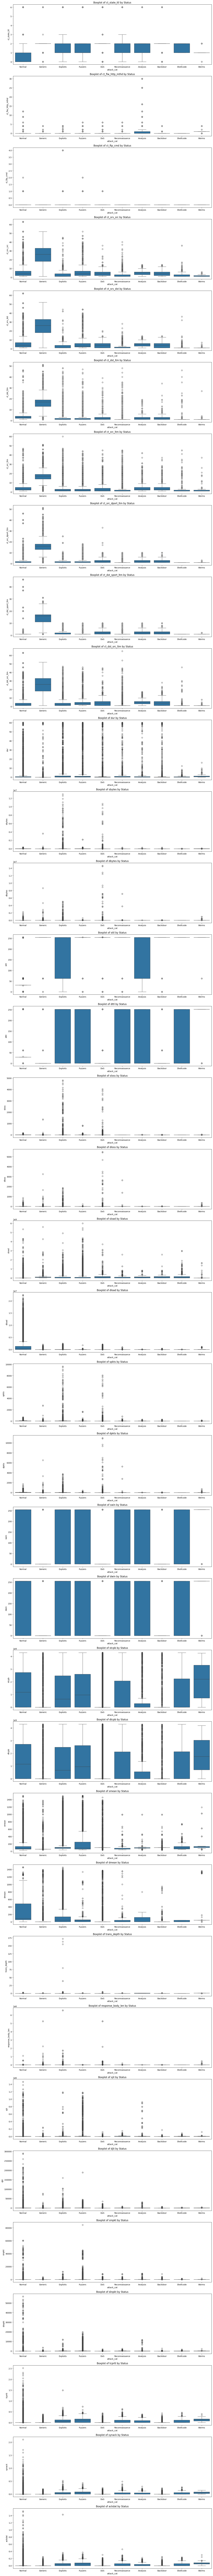

## Summary of Chi-Square Test Results for Categorical Features
|    | Feature         |       Chi-Square |   p-value | Significant   |
|---:|:----------------|-----------------:|----------:|:--------------|
|  0 | state           |  90016.5         |         0 | True          |
|  1 | service         | 156775           |         0 | True          |
|  2 | proto           | 152404           |         0 | True          |
|  3 | attack_cat      |      1.57807e+06 |         0 | True          |
|  4 | is_sm_ips_ports |   5689.43        |         0 | True          |
|  5 | is_ftp_login    |   2980.55        |         0 | True          |

## Summary of ANOVA Results for Numerical Features
|    | Feature           |   F-Statistic |      p-value | Significant   |
|---:|:------------------|--------------:|-------------:|:--------------|
|  0 | ct_state_ttl      |    11425.6    | 0            | True          |
|  1 | ct_flw_http_mthd  |     1378.57   | 0            | True          |
|  2 | ct_ftp_cmd        |      316.993  | 0            | True          |
|  3 | ct_srv_src        |    39410.2    | 0            | True          |
|  4 | ct_srv_dst        |    41443.2    | 0            | True          |
|  5 | ct_dst_ltm        |    32000.6    | 0            | True          |
|  6 | ct_src_ltm        |    20504.3    | 0            | True          |
|  7 | ct_src_dport_ltm  |    41133.8    | 0            | True          |
|  8 | ct_dst_sport_ltm  |    75754.1    | 0            | True          |
|  9 | ct_dst_src_ltm    |    42038.2    | 0            | True          |
| 10 | dur               |      423.572  | 0            | True          |
| 11 | sbytes            |       66.4807 | 8.07959e-123 | True          |
| 12 | dbytes            |      153.524  | 1.16177e-290 | True          |
| 13 | sttl              |    22882.6    | 0            | True          |
| 14 | dttl              |     6868.76   | 0            | True          |
| 15 | sloss             |       73.8544 | 5.13228e-137 | True          |
| 16 | dloss             |      239.843  | 0            | True          |
| 17 | sload             |      892.45   | 0            | True          |
| 18 | dload             |     3396.58   | 0            | True          |
| 19 | spkts             |      155.351  | 3.45767e-294 | True          |
| 20 | dpkts             |      348.951  | 0            | True          |
| 21 | swin              |     8417.75   | 0            | True          |
| 22 | dwin              |     8036.83   | 0            | True          |
| 23 | stcpb             |     4308.34   | 0            | True          |
| 24 | dtcpb             |     4301.64   | 0            | True          |
| 25 | smean             |     1555.37   | 0            | True          |
| 26 | dmean             |     3644.97   | 0            | True          |
| 27 | trans_depth       |      237.529  | 0            | True          |
| 28 | response_body_len |       20.3783 | 1.03224e-34  | True          |
| 29 | sjit              |      297.166  | 0            | True          |
| 30 | djit              |      210.434  | 0            | True          |
| 31 | sinpkt            |      597.599  | 0            | True          |
| 32 | dinpkt            |      132.928  | 6.16001e-251 | True          |
| 33 | tcprtt            |     3536.06   | 0            | True          |
| 34 | synack            |     2928.2    | 0            | True          |
| 35 | ackdat            |     3346.28   | 0            | True          |

In [61]:
# Code for Understanding Correlation analysis against the target feature (attack_cat)

chi_square_results = []  

# Display contingency table and Chi-Square test for each categorical feature with 'attack_cat'
for feature in categorical_features + binary_features:
    contigency_table = pd.crosstab(df_train['attack_cat'], df_train[feature])
    markdown_content = f"#### Contingency Table for {feature}\n"
    markdown_content += contigency_table.to_markdown()
    
    chi2, p, dof, expected = chi2_contingency(contigency_table)

    markdown_content += f"\n\n**Chi-Square Test Results for {feature}**:\n"
    markdown_content += f"- Chi-Square Statistic: {chi2:.4f}\n"
    markdown_content += f"- p-value: {p:.4e}\n"
    if p < 0.05:
        markdown_content += f"\n**Conclusion**: {feature} is significantly associated with 'attack_cat'.\n"
        chi_square_results.append((feature, chi2, p, True))
    else:
        markdown_content += f"\n**Conclusion**: {feature} is not significantly associated with 'attack_cat'.\n"
        chi_square_results.append((feature, chi2, p, False))
    
    display(Markdown(markdown_content))

# Visualize and compute correlation between numerical features and 'attack_cat'
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(15, len(numerical_features) * 5))

anova_results = []

for i, feature in enumerate(numerical_features):
    # Visualize with boxplot
    sn.boxplot(x=df_train['attack_cat'], y=df_train[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by attack_cat')
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('attack_cat')

    groups = [group[feature].dropna() for _, group in df_train.groupby('attack_cat')]
    f_stat, p_value = f_oneway(*groups)

    markdown_content = f"#### ANOVA Results for {feature}\n"
    markdown_content += f"- F-Statistic: {f_stat:.4f}\n"
    markdown_content += f"- p-value: {p_value:.4e}\n"
    if p_value < 0.05:
        markdown_content += f"\n**  **: {feature} is significantly different across 'attack_cat' categories.\n"
        anova_results.append((feature, f_stat, p_value, True))
    else:
        markdown_content += f"\n**Conclusion**: {feature} does not differ significantly across 'attack_cat' categories.\n"
        anova_results.append((feature, f_stat, p_value, False))

    display(Markdown(markdown_content))
plt.tight_layout()
plt.show()

chi2_df = pd.DataFrame(chi_square_results, columns=['Feature', 'Chi-Square', 'p-value', 'Significant'])
markdown_content = "## Summary of Chi-Square Test Results for Categorical Features\n"
markdown_content += chi2_df.to_markdown()

anova_df = pd.DataFrame(anova_results, columns=['Feature', 'F-Statistic', 'p-value', 'Significant'])
markdown_content += "\n\n## Summary of ANOVA Results for Numerical Features\n"
markdown_content += anova_df.to_markdown()

display(Markdown(markdown_content))

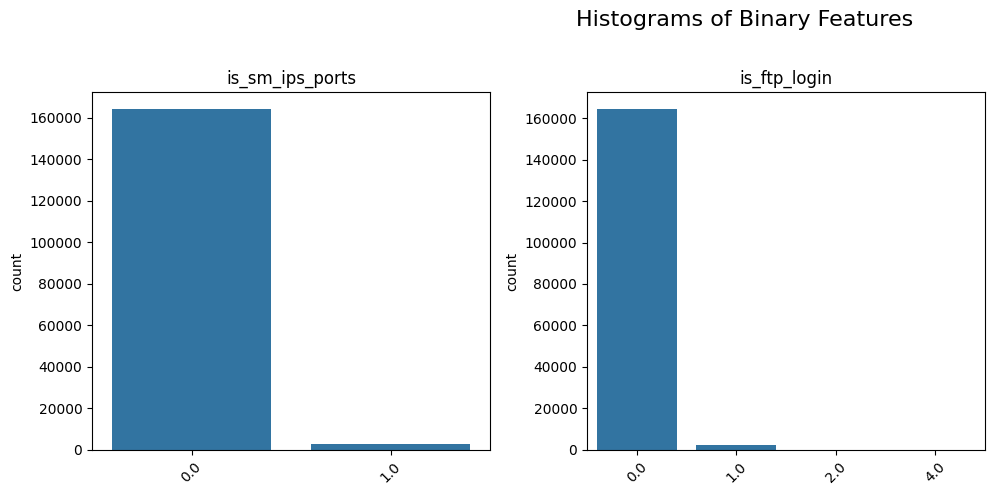

In [62]:
# Untuk melihat seberapa banyak sih missing value di binary features
# Function to plot histograms
def plot_histograms(data, features, feature_type):
    if not features:  # Check for empty feature list
        print(f"No {feature_type} features to plot.")
        return

    num_plots = len(features)
    num_cols = 3  # Number of columns for subplots
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    fig.suptitle(f'Histograms of {feature_type} Features', fontsize=16)

    # Ensure axes is always 2D for consistency
    axes = axes.reshape(-1) if num_rows == 1 else axes.flat

    for i, feature in enumerate(features):
        ax = axes[i]
        if feature_type == 'Numerical':
            sn.histplot(data[feature], ax=ax, kde=True)
        else:
            sn.countplot(x=feature, data=data, ax=ax)
            ax.tick_params(axis='x', rotation=45)

        ax.set_title(feature)
        ax.set_xlabel('')  # Remove x-axis label

    # Remove unused subplots
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for suptitle
    plt.show()

# Plot histograms for each feature type
plot_histograms(df_train, binary_features, 'Binary')


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [63]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [64]:

def fill_missing_values(data):
  for feature in binary_features:
    # Isi NA dengan -1 terlebih dahulu
    data[feature] = df_train[feature].fillna(-1)
    # Konversi nilai menjadi integer
    data[feature] = df_train[feature].astype(int)

  data[categorical_features] = data[categorical_features].fillna("Unknown")

  for feature in numerical_features:
    # 1. Akhirnya diisi median AWKOAWKOAW
    data[feature] = data[feature].fillna(data[feature].median())

    # 2. Metode Iterative Imputer ga kelar kelar 🗿🙏🙏
      # imputer = IterativeImputer(max_iter=10, random_state=42)
      # data[numerical_features] = imputer.fit_transform(data[numerical_features])

    # 3. Metode Randomforest ga kelar kelar 🗿🙏🙏
      # train_data = data[data[col].notna()]
      # predict_data = data[data[col].isna()]

      # X_train = train_data.drop(columns=[col])
      # y_train = train_data[col]
      # X_train = pd.get_dummies(X_train, drop_first=True)

      # X_predict = predict_data.drop(columns=[col])
      # X_predict = pd.get_dummies(X_predict, drop_first=True)
      # X_predict = X_predict.reindex(columns=X_train.columns, fill_value=0)

      # model = RandomForestRegressor(random_state=42, n_estimators=100)
      # model.fit(X_train, y_train)
      # data.loc[data[col].isna(), col] = model.predict(X_predict)


  return data

df_train = fill_missing_values(df_train)

# Diprint lagi biar keliatan before afternya
display_feature_summaries(df_train, categorical_features, numerical_features, binary_features)

### Categorical Features Values

#### state
* Unique values: 10
* Values: ['FIN' 'INT' 'CON' 'Unknown' 'REQ' 'ECO' 'RST' 'URN' 'PAR' 'no']

#### service
* Unique values: 14
* Values: ['-' 'dns' 'smtp' 'Unknown' 'http' 'pop3' 'ftp' 'ssh' 'ftp-data' 'ssl'
 'dhcp' 'snmp' 'radius' 'irc']

#### proto
* Unique values: 134
* Values: ['tcp' 'udp' 'st2' 'unas' 'irtp' 'Unknown' 'vmtp' 'any' 'cpnx' 'sctp'
 'ospf' 'fc' 'cftp' 'rsvp' 'aris' 'dgp' 'ipv6-route' 'snp' 'pnni' 'arp'
 'cbt' 'scps' 'tcf' 'leaf-1' 'swipe' 'wb-mon' 'crudp' 'sun-nd' 'rdp'
 'gmtp' 'ifmp' 'mobile' 'prm' 'sps' 'ipx-n-ip' 'ipip' 'ipv6-no' 'crtp'
 'gre' 'zero' 'hmp' 'trunk-1' 'idpr' 'ib' 'idpr-cmtp' 'vines' 'micp' 'a/n'
 'ipv6' 'narp' 'ttp' 'eigrp' 'uti' 'mux' 'pim' 'srp' 'wsn' 'tlsp' 'argus'
 '3pc' 'ax.25' 'ipnip' 'l2tp' 'skip' 'ipv6-frag' 'il' 'rvd' 'visa' 'xtp'
 'sm' 'xns-idp' 'ipv6-opts' 'encap' 'ippc' 'merit-inp' 'dcn' 'netblt'
 'bbn-rcc' 'emcon' 'nsfnet-igp' 'iso-tp4' 'ipcv' 'sat-mon' 'nvp' 'i-nlsp'
 'etherip' 'pvp' 'smp' 'idrp' 'ipcomp' 'mhrp' 'ddx' 'icmp' 'kryptolan'
 'tp++' 'aes-sp3-d' 'wb-expak' 'sprite-rpc' 'iso-ip' 'mtp' 'chaos' 'sep'
 'fire' 'ip' 'sccopmce' 'ddp' 'br-sat-mon' 'pgm' 'pri-enc' 'iplt' 'egp'
 'leaf-2' 'vrrp' 'ptp' 'pipe' 'pup' 'sat-expak' 'secure-vmtp' 'trunk-2'
 'cphb' 'sdrp' 'ggp' 'qnx' 'xnet' 'compaq-peer' 'stp' 'igp' 'mfe-nsp'
 'bna' 'isis' 'iatp' 'larp' 'igmp' 'rtp']

#### attack_cat
* Unique values: 10
* Values: ['Normal' 'Generic' 'Exploits' 'Fuzzers' 'DoS' 'Reconnaissance' 'Analysis'
 'Backdoor' 'Shellcode' 'Worms']


### Numerical Features Values

#### ct_state_ttl
* Unique values: 5
* Values: [0. 2. 1. 3. 6.]

#### ct_flw_http_mthd
* Unique values: 11
* Values: [ 0.  1.  4.  2.  6. 16. 30.  9. 25. 12.  3.]

#### ct_ftp_cmd
* Unique values: 4
* Values: [0. 1. 2. 4.]

#### ct_srv_src
* Unique values: 52
* Values: [11. 10.  4.  9.  3. 34.  6.  1. 17.  5. 13. 31. 42.  7.  2. 27. 12. 33.
 14. 26.  8. 24. 29. 38. 36. 63. 19. 20. 46. 18. 44. 28. 30. 22. 40. 21.
 23. 25. 32. 15. 51. 16. 39. 35. 43. 50. 49. 37. 41. 45. 52. 47.]

#### ct_srv_dst
* Unique values: 52
* Values: [ 4. 10.  9.  3. 34.  1.  5. 17. 13.  2. 31. 42. 16.  7. 27. 26.  6. 33.
 14.  8. 12. 24. 29. 18. 36. 62. 19. 44. 20. 46. 28. 30. 22. 40. 23. 25.
 39. 32. 51. 21. 35. 11. 43. 15. 50. 49. 38. 37. 41. 45. 47. 52.]

#### ct_dst_ltm
* Unique values: 50
* Values: [ 5. 10.  2.  3.  4. 25.  1. 17.  7. 24. 31. 30. 16.  8. 14. 18. 29. 13.
 36. 33. 12. 28. 11. 19. 32.  9. 23. 34. 15.  6. 35. 51. 21. 22. 20. 45.
 27. 37. 26. 50. 38. 46. 42. 48. 39. 41. 43. 40. 44. 47.]

#### ct_src_ltm
* Unique values: 50
* Values: [ 4. 10.  2.  3. 25.  9.  1. 18. 17.  5. 24. 31. 30.  7. 16. 22. 20.  8.
  6. 35. 29. 12. 36. 34. 26. 13. 14. 28. 11. 21. 33. 32. 19. 27. 51. 15.
 46. 50. 38. 23. 37. 42. 40. 41. 39. 43. 44. 60. 45. 47.]

#### ct_src_dport_ltm
* Unique values: 47
* Values: [ 2.  1. 25.  9.  3. 17.  5. 24. 31. 10. 16.  8. 13.  4. 29. 18. 12. 36.
 33. 28. 11. 32.  6. 23. 34. 15. 51. 14. 21. 20.  7. 45. 19. 46. 22. 26.
 50. 38. 35. 27. 42. 30. 37. 41. 39. 43. 40.]

#### ct_dst_sport_ltm
* Unique values: 32
* Values: [ 1. 10. 12.  9.  2. 17. 14. 15.  3. 16.  8.  4.  5. 18. 24.  7. 13.  6.
 11. 27. 46. 22. 20. 23. 19. 26. 28. 21. 25. 31. 37. 40.]

#### ct_dst_src_ltm
* Unique values: 54
* Values: [ 5. 10.  4.  6.  1. 34.  9.  3. 17.  2. 13.  7. 31. 42. 27. 26. 12. 24.
 29. 18. 38. 36. 63. 19. 44. 20.  8. 46. 33. 28. 30. 22. 40. 23. 25. 32.
 39. 14. 51. 15. 16. 21. 35. 43. 41. 11. 50. 49. 37. 45. 47. 52. 65. 54.]

#### dur
* Min: 0.0
* Mean: 1.2917607581455564
* Max: 59.999989
* STD: 6.328913809661338
* 25%: 8e-06
* 50%: 0.001548
* 75%: 0.62566

#### sbytes
* Min: 28.0
* Mean: 8329.609612127226
* Max: 12965233.0
* STD: 167005.94760217602
* 25%: 114.0
* 50%: 450.0
* 75%: 1264.0

#### dbytes
* Min: 0.0
* Mean: 14188.710204686868
* Max: 14655550.0
* STD: 139388.72737556155
* 25%: 0.0
* 50%: 164.0
* 75%: 832.0

#### sttl
* Unique values: 11
* Values: [ 31. 254.  62.   0.  63.  64.   1.  60. 255.  29. 252.]

#### dttl
* Unique values: 6
* Values: [ 29.   0. 252.  60.  31. 254.]

#### sloss
* Min: 0.0
* Mean: 4.658796288375223
* Max: 4803.0
* STD: 63.22929695493937
* 25%: 0.0
* 50%: 0.0
* 75%: 2.0

#### dloss
* Min: 0.0
* Mean: 6.6147164667704645
* Max: 5484.0
* STD: 50.48168638574986
* 25%: 0.0
* 50%: 0.0
* 75%: 2.0

#### sload
* Min: 0.0
* Mean: 69786500.04440296
* Max: 5988000256.0
* STD: 184354888.09551057
* 25%: 14682.99902
* 50%: 871454.4375
* 75%: 84000000.0

#### dload
* Min: 0.0
* Mean: 638070.4846456477
* Max: 22422730.0
* STD: 2365584.817928832
* 25%: 0.0
* 50%: 1426.6297
* 75%: 17503.86719

#### spkts
* Min: 1.0
* Mean: 19.364603829110134
* Max: 9616.0
* STD: 133.08323785168
* 25%: 2.0
* 50%: 2.0
* 75%: 12.0

#### dpkts
* Min: 0.0
* Mean: 18.084686411050466
* Max: 10974.0
* STD: 108.17874888508678
* 25%: 0.0
* 50%: 2.0
* 75%: 10.0

#### swin
* Unique values: 11
* Values: [255.   0. 168. 103.  87. 167. 192.  45.  42.  14. 172.]

#### dwin
* Unique values: 7
* Values: [255.   0.  48.  37.  70. 244.  40.]

#### stcpb
* Min: 0.0
* Mean: 921665559.2431034
* Max: 4294958913.0
* STD: 1337964517.4510417
* 25%: 0.0
* 50%: 0.0
* 75%: 1790206352.0

#### dtcpb
* Min: 0.0
* Mean: 920681764.508512
* Max: 4294881924.0
* STD: 1336551787.9587345
* 25%: 0.0
* 50%: 0.0
* 75%: 1786885063.0

#### smean
* Min: 28.0
* Mean: 133.60602483161384
* Max: 1504.0
* STD: 200.04115517300028
* 25%: 57.0
* 50%: 73.0
* 75%: 100.0

#### dmean
* Min: 0.0
* Mean: 120.11278023964732
* Max: 1458.0
* STD: 252.2712630496459
* 25%: 0.0
* 50%: 44.0
* 75%: 84.0

#### trans_depth
* Unique values: 11
* Values: [  0.   1.   2.   4. 163. 172.   3.  80.  39. 155.   5.]

#### response_body_len
* Min: 0.0
* Mean: 2048.981487501497
* Max: 6558056.0
* STD: 53702.032263345835
* 25%: 0.0
* 50%: 0.0
* 75%: 0.0

#### sjit
* Min: 0.0
* Mean: 4745.110185909171
* Max: 1460480.016
* STD: 43943.94559124353
* 25%: 0.0
* 50%: 0.0
* 75%: 2234.541692

#### djit
* Min: 0.0
* Mean: 574.3747721731198
* Max: 289388.2697
* STD: 3980.32828818986
* 25%: 0.0
* 50%: 0.0
* 75%: 106.065219

#### sinpkt
* Min: 0.0
* Mean: 938.3452112458463
* Max: 84371.496
* STD: 7067.5038634993725
* 25%: 0.008
* 50%: 0.284723
* 75%: 50.624023

#### dinpkt
* Min: 0.0
* Mean: 83.39227787961173
* Max: 56716.824
* STD: 962.3323122336132
* 25%: 0.0
* 50%: 0.006
* 75%: 44.553398

#### tcprtt
* Min: 0.0
* Mean: 0.03924807272685795
* Max: 2.518893
* STD: 0.07792671080987941
* 25%: 0.0
* 50%: 0.0
* 75%: 0.056037

#### synack
* Min: 0.0
* Mean: 0.0199935003963705
* Max: 2.100352
* STD: 0.04270734538412354
* 25%: 0.0
* 50%: 0.0
* 75%: 0.014692

#### ackdat
* Min: 0.0
* Mean: 0.019402174904899597
* Max: 1.520884
* STD: 0.03985482775533449
* 25%: 0.0
* 50%: 0.0
* 75%: 0.03237


### Binary Features Values

#### is_sm_ips_ports
* Unique values: 3
* Values: [ 0 -1  1]

#### is_ftp_login
* Unique values: 5
* Values: [ 0 -1  1  2  4]


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [65]:
def transform_outliers(data, numerical_features):
    #1. Outlier di numerik di-cap ke batas atas dan bawah quartil
    for feature in numerical_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)

        IQR = Q3 - Q1

        data[feature] = data[feature].apply(lambda x: max(x, Q1 - 1.5 * IQR) if x < (Q1 - 1.5 * IQR) else x)
        data[feature] = data[feature].apply(lambda x: min(x, Q3 + 1.5 * IQR) if x > (Q3 + 1.5 * IQR) else x)

    #2. Untuk kategorikal udah dicek secara EDA (kasat mata) tu aman

    #3. Untuk binary coy ada yg eror
    #Katanya is_ftp_login binary tapi kok ada juga yg nilainya 2 dan 4?
    data['is_ftp_login'] = data['is_ftp_login'].apply(lambda x: x if x in [0, 1] else -1)
    return data

df_train = transform_outliers(df_train, numerical_features)


#Print lagi biar keliatan before afternya
display_feature_summaries(df_train, categorical_features, numerical_features, binary_features)

### Categorical Features Values

#### state
* Unique values: 10
* Values: ['FIN' 'INT' 'CON' 'Unknown' 'REQ' 'ECO' 'RST' 'URN' 'PAR' 'no']

#### service
* Unique values: 14
* Values: ['-' 'dns' 'smtp' 'Unknown' 'http' 'pop3' 'ftp' 'ssh' 'ftp-data' 'ssl'
 'dhcp' 'snmp' 'radius' 'irc']

#### proto
* Unique values: 134
* Values: ['tcp' 'udp' 'st2' 'unas' 'irtp' 'Unknown' 'vmtp' 'any' 'cpnx' 'sctp'
 'ospf' 'fc' 'cftp' 'rsvp' 'aris' 'dgp' 'ipv6-route' 'snp' 'pnni' 'arp'
 'cbt' 'scps' 'tcf' 'leaf-1' 'swipe' 'wb-mon' 'crudp' 'sun-nd' 'rdp'
 'gmtp' 'ifmp' 'mobile' 'prm' 'sps' 'ipx-n-ip' 'ipip' 'ipv6-no' 'crtp'
 'gre' 'zero' 'hmp' 'trunk-1' 'idpr' 'ib' 'idpr-cmtp' 'vines' 'micp' 'a/n'
 'ipv6' 'narp' 'ttp' 'eigrp' 'uti' 'mux' 'pim' 'srp' 'wsn' 'tlsp' 'argus'
 '3pc' 'ax.25' 'ipnip' 'l2tp' 'skip' 'ipv6-frag' 'il' 'rvd' 'visa' 'xtp'
 'sm' 'xns-idp' 'ipv6-opts' 'encap' 'ippc' 'merit-inp' 'dcn' 'netblt'
 'bbn-rcc' 'emcon' 'nsfnet-igp' 'iso-tp4' 'ipcv' 'sat-mon' 'nvp' 'i-nlsp'
 'etherip' 'pvp' 'smp' 'idrp' 'ipcomp' 'mhrp' 'ddx' 'icmp' 'kryptolan'
 'tp++' 'aes-sp3-d' 'wb-expak' 'sprite-rpc' 'iso-ip' 'mtp' 'chaos' 'sep'
 'fire' 'ip' 'sccopmce' 'ddp' 'br-sat-mon' 'pgm' 'pri-enc' 'iplt' 'egp'
 'leaf-2' 'vrrp' 'ptp' 'pipe' 'pup' 'sat-expak' 'secure-vmtp' 'trunk-2'
 'cphb' 'sdrp' 'ggp' 'qnx' 'xnet' 'compaq-peer' 'stp' 'igp' 'mfe-nsp'
 'bna' 'isis' 'iatp' 'larp' 'igmp' 'rtp']

#### attack_cat
* Unique values: 10
* Values: ['Normal' 'Generic' 'Exploits' 'Fuzzers' 'DoS' 'Reconnaissance' 'Analysis'
 'Backdoor' 'Shellcode' 'Worms']


### Numerical Features Values

#### ct_state_ttl
* Unique values: 5
* Values: [0.  2.  1.  3.  3.5]

#### ct_flw_http_mthd
* Unique values: 1
* Values: [0.]

#### ct_ftp_cmd
* Unique values: 1
* Values: [0.]

#### ct_srv_src
* Unique values: 25
* Values: [11.  10.   4.   9.   3.  24.5  6.   1.  17.   5.  13.   7.   2.  12.
 14.   8.  24.  19.  20.  18.  22.  21.  23.  15.  16. ]

#### ct_srv_dst
* Unique values: 25
* Values: [ 4.  10.   9.   3.  24.5  1.   5.  17.  13.   2.  16.   7.   6.  14.
  8.  12.  24.  18.  19.  20.  22.  23.  21.  11.  15. ]

#### ct_dst_ltm
* Unique values: 14
* Values: [ 5.  10.   2.   3.   4.  13.5  1.   7.   8.  13.  12.  11.   9.   6. ]

#### ct_src_ltm
* Unique values: 17
* Values: [ 4. 10.  2.  3. 17.  9.  1.  5.  7. 16.  8.  6. 12. 13. 14. 11. 15.]

#### ct_src_dport_ltm
* Unique values: 9
* Values: [2.  1.  8.5 3.  5.  8.  4.  6.  7. ]

#### ct_dst_sport_ltm
* Unique values: 6
* Values: [1. 6. 2. 3. 4. 5.]

#### ct_dst_src_ltm
* Unique values: 24
* Values: [ 5.  10.   4.   6.   1.  23.5  9.   3.  17.   2.  13.   7.  12.  18.
 19.  20.   8.  22.  23.  14.  15.  16.  21.  11. ]

#### dur
* Min: 0.0
* Mean: 0.346895516365254
* Max: 1.5641379999999998
* STD: 0.5352758307946424
* 25%: 8e-06
* 50%: 0.001548
* 75%: 0.62566

#### sbytes
* Min: 28.0
* Mean: 904.2581598143047
* Max: 2989.0
* STD: 1022.7735103390316
* 25%: 114.0
* 50%: 450.0
* 75%: 1264.0

#### dbytes
* Min: 0.0
* Mean: 571.7958948563086
* Max: 2080.0
* STD: 803.9307973498704
* 25%: 0.0
* 50%: 164.0
* 75%: 832.0

#### sttl
* Unique values: 11
* Values: [ 31. 254.  62.   0.  63.  64.   1.  60. 255.  29. 252.]

#### dttl
* Unique values: 6
* Values: [ 29.   0. 252.  60.  31. 254.]

#### sloss
* Unique values: 6
* Values: [5. 0. 2. 3. 1. 4.]

#### dloss
* Unique values: 6
* Values: [5. 0. 3. 1. 2. 4.]

#### sload
* Min: 0.0
* Mean: 46893407.772073485
* Max: 209977975.50147
* STD: 66881995.14771646
* 25%: 14682.99902
* 50%: 871454.4375
* 75%: 84000000.0

#### dload
* Min: 0.0
* Mean: 11906.603360388226
* Max: 43759.667975000004
* STD: 17930.883768075466
* 25%: 0.0
* 50%: 1426.6297
* 75%: 17503.86719

#### spkts
* Unique values: 18
* Values: [27.  2.  4. 14. 10. 22. 12. 20. 16. 18. 24. 26.  1.  8.  6.  3. 11. 21.]

#### dpkts
* Unique values: 16
* Values: [25.  0.  2. 16. 12.  8.  4. 10.  6. 22. 14. 20. 24. 18.  1.  3.]

#### swin
* Unique values: 11
* Values: [255.   0. 168. 103.  87. 167. 192.  45.  42.  14. 172.]

#### dwin
* Unique values: 7
* Values: [255.   0.  48.  37.  70. 244.  40.]

#### stcpb
* Min: 0.0
* Mean: 921665559.2431034
* Max: 4294958913.0
* STD: 1337964517.4510417
* 25%: 0.0
* 50%: 0.0
* 75%: 1790206352.0

#### dtcpb
* Min: 0.0
* Mean: 920681764.508512
* Max: 4294881924.0
* STD: 1336551787.9587345
* 25%: 0.0
* 50%: 0.0
* 75%: 1786885063.0

#### smean
* Unique values: 128
* Values: [ 58.   57.  164.5  56.   65.   62.   90.  100.   55.   67.  134.   81.
  53.   86.   93.   88.  130.   66.   73.   92.   78.   52.   84.  155.
  64.   60.   98.   48.   46.   85.  114.   45.   74.  152.   68.   82.
 161.   61.   83.  105.   59.   99.  120.   96.   43.  102.   70.  131.
 108.  160.   50.  132.   91.   49.   39.   54.   63.   95.  138.   51.
  72.   97.  159.   47.  142.   87.   80.  157.   89.  163.  101.   75.
  76.  153.   94.  117.   77.  124.  129.  164.  121.  127.  122.  136.
  71.  151.   79.  103.  112.  146.  119.  116.  149.  110.  109.  118.
  44.  156.  125.   69.  140.  104.  106.  115.  113.  162.  144.  154.
 111.  135.  107.  145.  150.  133.  123.  137.  126.  143.  128.  148.
 147.   38.  141.   28.  139.  158.   40.   41. ]

#### dmean
* Min: 0.0
* Mean: 56.6788885657091
* Max: 210.0
* STD: 71.08794832025362
* 25%: 0.0
* 50%: 44.0
* 75%: 84.0

#### trans_depth
* Unique values: 1
* Values: [0.]

#### response_body_len
* Unique values: 1
* Values: [0.]

#### sjit
* Min: 0.0
* Mean: 1294.3633045906374
* Max: 5586.354229999999
* STD: 2041.2096090856935
* 25%: 0.0
* 50%: 0.0
* 75%: 2234.541692

#### djit
* Min: 0.0
* Mean: 60.85013983457094
* Max: 265.1630475
* STD: 94.53561333072366
* 25%: 0.0
* 50%: 0.0
* 75%: 106.065219

#### sinpkt
* Min: 0.0
* Mean: 28.04496624124135
* Max: 126.5480575
* STD: 43.58434657612904
* 25%: 0.008
* 50%: 0.284723
* 75%: 50.624023

#### dinpkt
* Min: 0.0
* Mean: 24.55435546059392
* Max: 111.383495
* STD: 40.0675358878999
* 25%: 0.0
* 50%: 0.006
* 75%: 44.553398

#### tcprtt
* Min: 0.0
* Mean: 0.03154090370192938
* Max: 0.14009249999999998
* STD: 0.053737910823341534
* 25%: 0.0
* 50%: 0.0
* 75%: 0.056037

#### synack
* Min: 0.0
* Mean: 0.009159234520163567
* Max: 0.03673
* STD: 0.015354332361678347
* 25%: 0.0
* 50%: 0.0
* 75%: 0.014692

#### ackdat
* Min: 0.0
* Mean: 0.016656430241643424
* Max: 0.080925
* STD: 0.028762677950071716
* 25%: 0.0
* 50%: 0.0
* 75%: 0.03237


### Binary Features Values

#### is_sm_ips_ports
* Unique values: 3
* Values: [ 0 -1  1]

#### is_ftp_login
* Unique values: 3
* Values: [ 0 -1  1]


### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [66]:
# Write your code here

duplicate_count = df_train.duplicated().sum()
markdown_content = "### Duplicates\n"
markdown_content += f"* Total duplicates: {duplicate_count}\n"
display(Markdown(markdown_content))

# View the duplicated rows
if duplicate_count > 0:
    duplicates = df_train[df_train.duplicated(keep=False)]
    markdown_content = "#### Duplicate rows\n"
    display(Markdown(markdown_content))
    display(duplicates)

    df_train.drop_duplicates(inplace=True)
    markdown_content = f"* Duplicates removed.\n"
    display(Markdown(markdown_content))
else:
    markdown_content = f"* No duplicates found.\n"
    display(Markdown(markdown_content))

### Duplicates
* Total duplicates: 0


* No duplicates found.


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [67]:
# Write your code here

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [68]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [69]:
# Write your code here

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [70]:
# Untuk binary_features sebab udah 0,1, jadi gausah diapa-apain lagi
def encode_binary_features(data, binary_features):
    for feature in binary_features:
        data[feature] = data[feature].astype(int)

# Untuk kategori nominal, maka harus pake one hot
# Kebetulan semua kategorikal di data adalah nominal
nominal_features = ['proto', 'state', 'service']
def encode_categorical_features(data, nominal_features):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    categorical_encoded = one_hot_encoder.fit_transform(data[nominal_features])
    categorical_encoded_data = pd.DataFrame(categorical_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_features))

    # Masukin hasil encoding ke data asli
    data = pd.concat([data.reset_index(drop=True), categorical_encoded_data.reset_index(drop=True)], axis=1)
    data.drop(columns=categorical_features, inplace=True)

# Target feature juga perlu di-encode supaya bisa masuk ke algoritma
def encode_target_feature(data):
    label_encoder = LabelEncoder()
    data['attack_cat_encoded'] = label_encoder.fit_transform(data['attack_cat'].fillna('Unknown'))

    # Drop yang asli
    data.drop(columns=['attack_cat'], inplace=True)

# Encoding

encode_binary_features(df_train, binary_features)
encode_categorical_features(df_train, nominal_features)
encode_target_feature(df_train)
print("Encoding complete!")


ValueError: input_features is not equal to feature_names_in_

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [105]:
# Write your code here

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [106]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [107]:
# Write your code here

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [108]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [109]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [110]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [111]:
# Type your code here

## B. Naive Bayes

In [112]:
# Type your code here

## C. ID3

In [113]:
# Type your code here

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [114]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [115]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`